<a href="https://colab.research.google.com/github/FrancescaMoi/SentimentAnalysis/blob/main/sentyment_analysis_IMDb_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentyment analysis**

**Dataset**

In [40]:
import pandas as pd

df = pd.read_csv("drive/MyDrive/Colab Notebooks/PilloleIA/data/IMDB Dataset.csv")
print('Shape of the dataset: ', df.shape)
df.head()


Shape of the dataset:  (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Dataset analysis**

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [31]:
# print('NaN counts of columns: \n ', df.isna().sum()) # check for duplicates
# df = df.dropna()

df = df.drop_duplicates()
print('\nShape of the unique dataset: ', df.shape)


Shape of the unique dataset:  (49582, 2)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


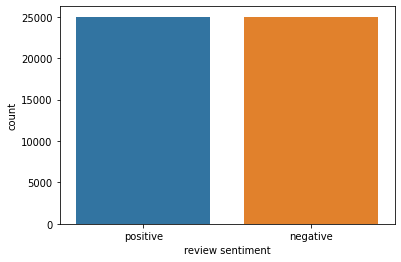

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = list(df.sentiment.unique())
ax = sns.countplot(df['sentiment'])
plt.xlabel('review sentiment')
ax.set_xticklabels(labels);

**Data Preprocessing**

In [33]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = nltk.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [44]:
import re

def clean_text(text):
  text = re.sub("<br />", "", text) # removing break line tag
  text = re.sub("[^a-zA-Z0-9\s]", " ", text) # removing punctuation
  text = re.sub("\s+", " ", text) # removing multiple spaces
  text = text.strip() # removing spaces before and after the string
  text = text.lower() # transform the text in lower case format
  text_tokens = [word for word in text.split() if word not in stop_words]
  text_tokens = [word for word in text_tokens if word.isalpha()]  
  # text_tokens = [lemmatizer.lemmatize(word) for word in text_tokens]
  cleaned_text = ' '.join(text_tokens)
  return cleaned_text

df['review'] = df['review'].apply(lambda x: clean_text(x))
df['review']

0        one reviewers mentioned watching oz episode ho...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake thinks zombie...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 50000, dtype: object

**Split the dataset**

In [45]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['sentiment'])

print("Train set shape: ", df_train.shape)
print("Test set shape: ", df_test.shape)

print("\nTrain set classes distribution:\n", df_train['sentiment'].value_counts())
print("\nTest set classes distribution:\n", df_test['sentiment'].value_counts())



Train set shape:  (40000, 2)
Test set shape:  (10000, 2)

Train set classes distribution:
 positive    20000
negative    20000
Name: sentiment, dtype: int64

Test set classes distribution:
 negative    5000
positive    5000
Name: sentiment, dtype: int64


**Vectorize texts**

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
train_vectors = vectorizer.fit_transform(df_train['review'])
vectorized_train_df = pd.DataFrame(train_vectors.toarray(), columns=vectorizer.get_feature_names())
vectorized_train_df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,absolutely,across,act,acted,acting,action,actor,actors,actress,...,wrote,yeah,year,years,yes,yet,york,young,younger,zombie
0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.080237,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.123363,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
test_vectors = vectorizer.transform(df_test['review'])
vectorized_test_df = pd.DataFrame(test_vectors.toarray(), columns=vectorizer.get_feature_names())
vectorized_test_df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,absolutely,across,act,acted,acting,action,actor,actors,actress,...,wrote,yeah,year,years,yes,yet,york,young,younger,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.148439,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093607,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


**Training**

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(vectorized_train_df, df_train['sentiment'])

RandomForestClassifier()

**Testing and results evaluation**

In [49]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score

y_pred = rf_model.predict(vectorized_test_df)
y_test = df_test['sentiment']

accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred, pos_label='positive'), 3)
recall = round(recall_score(y_test, y_pred, pos_label='positive'), 3)
f1 = round(f1_score(y_test,y_pred, pos_label='positive'), 3)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", f1)

Accuracy:  0.835
Precision:  0.837
Recall:  0.832
F1_score:  0.834
